# Python Review

Reviewing some basic concepts in Python

* **`help` function**    
    When needed, use `help` to get the information about a function and the parameters it takes (e.g. `help(range)`)


In [1]:
help(range)

Help on built-in function range in module __builtin__:

range(...)
    range(stop) -> list of integers
    range(start, stop[, step]) -> list of integers
    
    Return a list containing an arithmetic progression of integers.
    range(i, j) returns [i, i+1, i+2, ..., j-1]; start (!) defaults to 0.
    When step is given, it specifies the increment (or decrement).
    For example, range(4) returns [0, 1, 2, 3].  The end point is omitted!
    These are exactly the valid indices for a list of 4 elements.



* **data structure `list`, function `range`**.    
    Create a list with the numbers 0-9 (including 9) in increasing order. Then create one in decreasing order

In [1]:
print(list(range(10)))
print(list(range(9,-1,-1)))
# or
print(list(reversed(range(10))))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


* **`for` loops**.        
    what happens when you add your two lists together using `+`? Now actually create a list with element-wise sum using a `for` loop

In [3]:
l = list(range(10))
print("adding lists",l+l)
s = [0]*10
for i in range(len(l)):
    s[i] = l[i]+l[i]
print("adding elements",s)

adding lists [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
adding elements [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


* **defining functions with `def`**.      
    this is how you define a function to add one to a number

        def plus_one(s):
            return s + 1

    note the indentation! whitespace matters in Python!

# Numpy basics

*Note*: if you're familiar with matlab, [this page](http://www.scipy.org/NumPy_for_Matlab_Users) will allow you to see the corresponding numpy terms to functions you already know

### Basics

* using `np.arange`, create an array of the numbers 0 - 9

In [5]:
import numpy as np
t = np.arange(10)
print(t)

[0 1 2 3 4 5 6 7 8 9]


* print the `type` of the array
* print the `type` of the first element in the array
* print the `shape` of the array 

In [6]:
print("type",type(t))
print("type",type(t[0]))
print(t.shape)

type <class 'numpy.ndarray'>
type <class 'numpy.int64'>
(10,)


* print the numbers at the 3rd to the 6th index in the array using slicing `[:]`

In [7]:
t[3:7]

array([3, 4, 5, 6])

* create an array of 10 elements, converting the list x into an array using `np.array`

In [8]:
x = [0,1,2,3,4,5,6,7,8,9]
t = np.array(x)
print(t)

[0 1 2 3 4 5 6 7 8 9]


look at the differences between the `+` operator on python `list`s and on numpy `array`s
 * try out `+` by adding the list you made in the previous section to itself
 * try out `+` by adding the array you made in this section to itself

look at the differences between the `*` operator on `np.array` and `np.matrix`
* what type of multiplication happens with 1D `np.array * np.array` ? use `t`
* what type of multiplication happens with 2D `np.matrix * np.matrix` ? use `m`
* which of those two types does `np.dot` do when applied on 2D `np.array` ? use `t2`

In [12]:
# + experiments
print("adding python lists",l+l)
print("adding numpy arrays",t+t)

# * experiments
m = np.matrix(t).reshape(2,5)
t2 = t.reshape(2,5)
print("multiplying numpy arrays",t*t)
print("multiplying numpy matrices",m*m.T)
print("np.dot on numpy arrays",np.dot(t2,t2.T))



adding python lists [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
adding numpy arrays [ 0  2  4  6  8 10 12 14 16 18]
multiplying numpy arrays [ 0  1  4  9 16 25 36 49 64 81]
multiplying numpy matrices [[ 30  80]
 [ 80 255]]
np.dot on numpy arrays [[ 30  80]
 [ 80 255]]


* what happens when you try to change the dimension of your 10 element array to (2,3)?
* what happens when you try to change it to (2,5)? double-check with the `shape` function

In [19]:
try:
    t.shape = (2,3)
except BaseException as error:
    print("Error:",error)

t = t.reshape(2,5)
print(t.shape)
print(t)

Error: cannot reshape array of size 10 into shape (2,3)
(2, 5)
[[0 1 2 3 4]
 [5 6 7 8 9]]


### Statistics

Now we're going to generate data points and verify statistics

* create a 2D array of shape (100,2) filled with the number 1 using `np.ones`

In [20]:
t = np.ones((100,2))
print(t.shape)

(100, 2)


Change each column to be numbers sampled from a gaussian (aka normal distribution) using `np.random.normal`
* for the column 0, set it to 100 samples from a gaussian with mean 0 and standard deviation 1 (use slicing in the form of `[:,0]`)
* for the column 1, set it to 100 samples from a gaussian with mean 0 and standard deviation 5

In [21]:
n = np.random.normal(loc=0,scale=1.0,size=100)
print(n.shape)
t[:,0] = n

n = np.random.normal(loc=0,scale=5.0,size=100)
print(n.shape)
t[:,1] = n

(100,)
(100,)


* check that the columns have the correct mean and standard deviation using `np.mean` and `np.std` making sure to correctly specify the `axis=` parameter)

In [22]:
print(np.mean(t, axis=0))
print(np.std(t, axis=0))

[ 0.05661077 -0.04458517]
[0.98061416 4.76533796]


# Fun with flowers

We're now going to work with some real data! We'll use the [iris](http://en.wikipedia.org/wiki/Iris_flower_data_set) dataset which you can download [here](http://www.iro.umontreal.ca/%7Edift3395/files/iris.txt). Download the file and put it into the same folder as this notebook, then load the file with `np.loadtxt`

 

In [23]:
iris = np.loadtxt('iris.txt')

### Working with `np.array`

Let's play around with the *array* of iris data

* print the shape of the array
* print all the elements of the array

In [24]:
print(iris.shape)
print(iris)

(150, 5)
[[5.1 3.5 1.4 0.2 1. ]
 [4.9 3.  1.4 0.2 1. ]
 [4.7 3.2 1.3 0.2 1. ]
 [4.6 3.1 1.5 0.2 1. ]
 [5.  3.6 1.4 0.2 1. ]
 [5.4 3.9 1.7 0.4 1. ]
 [4.6 3.4 1.4 0.3 1. ]
 [5.  3.4 1.5 0.2 1. ]
 [4.4 2.9 1.4 0.2 1. ]
 [4.9 3.1 1.5 0.1 1. ]
 [5.4 3.7 1.5 0.2 1. ]
 [4.8 3.4 1.6 0.2 1. ]
 [4.8 3.  1.4 0.1 1. ]
 [4.3 3.  1.1 0.1 1. ]
 [5.8 4.  1.2 0.2 1. ]
 [5.7 4.4 1.5 0.4 1. ]
 [5.4 3.9 1.3 0.4 1. ]
 [5.1 3.5 1.4 0.3 1. ]
 [5.7 3.8 1.7 0.3 1. ]
 [5.1 3.8 1.5 0.3 1. ]
 [5.4 3.4 1.7 0.2 1. ]
 [5.1 3.7 1.5 0.4 1. ]
 [4.6 3.6 1.  0.2 1. ]
 [5.1 3.3 1.7 0.5 1. ]
 [4.8 3.4 1.9 0.2 1. ]
 [5.  3.  1.6 0.2 1. ]
 [5.  3.4 1.6 0.4 1. ]
 [5.2 3.5 1.5 0.2 1. ]
 [5.2 3.4 1.4 0.2 1. ]
 [4.7 3.2 1.6 0.2 1. ]
 [4.8 3.1 1.6 0.2 1. ]
 [5.4 3.4 1.5 0.4 1. ]
 [5.2 4.1 1.5 0.1 1. ]
 [5.5 4.2 1.4 0.2 1. ]
 [4.9 3.1 1.5 0.2 1. ]
 [5.  3.2 1.2 0.2 1. ]
 [5.5 3.5 1.3 0.2 1. ]
 [4.9 3.6 1.4 0.1 1. ]
 [4.4 3.  1.3 0.2 1. ]
 [5.1 3.4 1.5 0.2 1. ]
 [5.  3.5 1.3 0.3 1. ]
 [4.5 2.3 1.3 0.3 1. ]
 [4.4 3.2 1.3 0.2 1. ]
 [

Accessing an element in a `np.array` is similar but not the same as a python `list`
* get the first element (index 0,0) of the `list` with `[][]`
* get the first element of the `np.array` using just`[,]`

In [26]:
l = [[0,1,3],
     [4,5,6],
     [7,8,9]]
nl = np.array(l)

print(l[0][0])
print(nl[0,0])

0
0


The advantage of `numpy` slicing is that you can access multiple dimensions or `axis` at the same time
* get just the numbers 4,5,7,8 in their matrix formation using `[:,:]`

In [27]:
# all the numbers
print(nl)
print(nl[0:,:3])

# getting 4,5,7,8 with a list
print([arr[:2] for arr in l[1:]])

# getting 4,5,7,8 with a numpy array
print(nl[1:,:2])

[[0 1 3]
 [4 5 6]
 [7 8 9]]
[[0 1 3]
 [4 5 6]
 [7 8 9]]
[[4, 5], [7, 8]]
[[4 5]
 [7 8]]


The dataset has 150 examples with 50 for each class. Each row corresponds to an example, and the five columns correspond to the flowers' four "features" (e.g. the length of the petal) and the "label" or "class" (which of the three species `1,2,3` the flower is) 
* print the 23rd example

In [34]:
iris[23]

array([5.1, 3.3, 1.7, 0.5, 1. ])

* print the third column

In [35]:
iris[:,2]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

* print the columns at index 1 and 2 for the first 10 elements

In [36]:
iris[0:10,1:3]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5]])

negative indices can be used just like in a list
* print the last row

In [37]:
iris[-1]

array([5.9, 3. , 5.1, 1.8, 3. ])

negative indices can be using with slicing as well
* print the 23rd row with all columns except the last one

In [41]:
iris[23,:-1]

array([5.1, 3.3, 1.7, 0.5])

### Some useful `numpy` functions

make sure you understand the following useful functions

**sum** : sum of the elements of an array        
> `axis` specifies which dimension to sum along

In [42]:
np.sum(iris)
np.sum(iris,axis=0)
np.sum(iris,axis=1) 

array([11.2, 10.5, 10.4, 10.4, 11.2, 12.4, 10.7, 11.1,  9.9, 10.6, 11.8,
       11. , 10.3,  9.5, 12.2, 13. , 12. , 11.3, 12.5, 11.7, 11.7, 11.7,
       10.4, 11.6, 11.3, 10.8, 11.4, 11.4, 11.2, 10.7, 10.7, 11.7, 11.9,
       12.3, 10.7, 10.6, 11.5, 11. ,  9.9, 11.2, 11.1,  9.4, 10.1, 11.7,
       12.2, 10.5, 11.7, 10.4, 11.7, 10.9, 18.3, 17.6, 18.4, 15.1, 17.4,
       16.3, 17.9, 13.6, 17.4, 15.2, 13.5, 16.6, 15.2, 17.1, 15.4, 17.6,
       16.6, 15.6, 16.4, 15.1, 17.7, 16.2, 17.2, 16.8, 16.9, 17.4, 17.8,
       18.4, 16.9, 14.8, 14.8, 14.6, 15.6, 17.4, 16.4, 17.5, 18. , 16.3,
       16. , 15.3, 15.7, 17.1, 15.6, 13.6, 15.8, 16.1, 16.1, 16.7, 13.7,
       15.9, 21.1, 18.5, 21.1, 19.6, 20.5, 22.3, 16.6, 21.3, 19.8, 22.4,
       19.8, 19.3, 20.4, 18.2, 19.1, 20.2, 19.8, 23.4, 22.5, 17.7, 21.1,
       18.3, 22.2, 18.7, 20.8, 21.2, 18.6, 18.8, 19.9, 20.6, 21.2, 23.1,
       20. , 18.7, 18.7, 22.1, 20.7, 19.8, 18.6, 20.5, 20.8, 20.4, 18.5,
       21.2, 21.2, 20.2, 18.7, 19.7, 20.3, 18.8])

**min**, **max** : minimum and maximum elements of an array (can also be done across an `axis`)

In [43]:
np.min(iris)
np.min(iris,axis=1)
np.min(iris,axis=0)

np.max(iris,axis=0)

array([7.9, 4.4, 6.9, 2.5, 3. ])

**argmax**, **argmin** : the indices of the minimum and maximum elements of an array (can also be done across an `axis`)

In [44]:
np.argmin(iris)
np.argmin(iris,axis=1)
np.argmin(iris,axis=0)

np.argmax(iris,axis=0)

array([131,  15, 118, 100, 100])

**abs** : absolute value

In [45]:
np.abs(iris[:,1:4])

array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.2],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.6, 1.4, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

** \*\* ** : exponential

In [46]:
iris[0,:-1]**4.5

array([1.52779749e+03, 2.80741231e+02, 4.54544242e+00, 7.15541753e-04])

** shuffle ** : randomly shuffle the elements in the array



In [48]:
seq = np.arange(10)
np.random.shuffle(seq)
print(seq)

[5 2 0 4 3 1 9 6 8 7]


`numpy` has many more useful mathematical functions such as 
* numpy.mean
* numpy.std
* numpy.cov
* numpy.dot
* numpy.invert
* numpy.unique
* numpy.vsplit
* numpy.vstack
* numpy.hsplit
* numpy.hstack

you can find all of them on the [documentation](http://docs.scipy.org/doc/numpy/reference/index.html)

# Plotting the flowers with Matplotlib

`matplotlib` is a great library for creating charts and graphs. Here are some practical function to visualize a dataset like `iris`

*Note*: if you want your `matplotlib` graphs to appear alongside your output in the notebook you have to specify this line `pylab %inline`

In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


* run the histogram with `pylab`

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

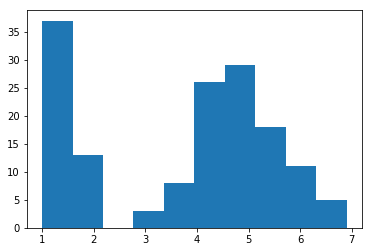

In [50]:
import pylab
pylab.hist(iris[:,2])

* run the scatterplot

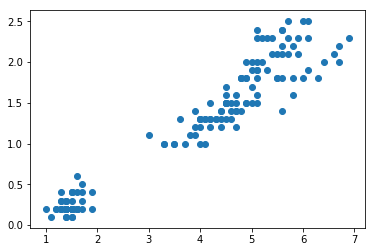

In [51]:
pylab.scatter(iris[:,2],iris[:,3])

* run the scatterplot but this time, color the circles by their corresponding "class"

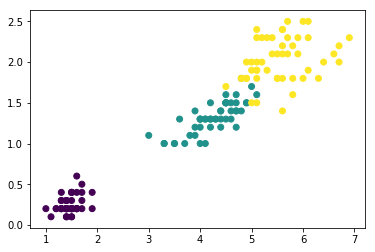

In [52]:
pylab.scatter(iris[:,2],iris[:,3],c=iris[:,-1])

* plot a sine wave and alongside it, plot a sine wave with gaussian noise

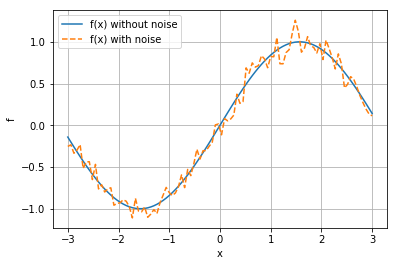

In [53]:
support = linspace(-3,3,100) # linspace generates here 100 numbers equally spaced between -3 and 3
fn = sin(support) 
bruit = randn(100)*0.1 # Gaussian noise, mean=0, variance=sqrt(0.1)
pylab.plot(support, fn) 
pylab.plot(support, fn + bruit,'--')
pylab.grid(True) # add a grid
pylab.xlabel('x')
pylab.ylabel('f')
pylab.legend(('f(x) without noise','f(x) with noise'))

### This is just the beginning!

You now have some of the basics down but you'll need more practise. Explore new functions and let's go through more tutorials!